# Zyfra Gold Mining

It's time to deal with a real data science problem from the gold mining sector. This project is provided by Zyfra.
When you finish, send your work to the project reviewer. You will receive feedback within 24 hours. After that, you will make any necessary changes to your work and send it for a second review.
Usually, this process has to be repeated several times until you get the green light from the reviewer and all the corrections are approved. That’s all part of the job.
Your project will be considered complete once the project reviewer approves it.


Task statement
Prepare a prototype of a machine learning model for Zyfra. The company develops efficiency solutions for heavy industry.
The model should predict the amount of gold recovered from gold ore. You have the data on extraction and purification.
The model will help to optimize the production and eliminate unprofitable parameters.
You need to:
Prepare the data;
Perform data analysis;
Develop and train a model.
To complete the project, you may want to use documentation from pandas, matplotlib, and sklearn.
The next lesson is about the ore purification process. You will pick the information that is important for the model development.

# Project description
The data is stored in three files:
gold_recovery_train.csv — training dataset download
gold_recovery_test.csv — test dataset download
gold_recovery_full.csv — source dataset download
Data is indexed with the date and time of acquisition (date feature). Parameters that are next to each other in terms of time are often similar.
Some parameters are not available because they were measured and/or calculated much later. That's why, some of the features that are present in the training set may be absent from the test set. The test set also doesn't contain targets.
The source dataset contains the training and test sets with all the features.
You have the raw data that was only downloaded from the warehouse. Before building the model, check the correctness of the data. For that, use our instructions.

Download and prepare the data. Explain the procedure.

In [161]:
# Loading all the libraries
import pandas as pd
from sklearn.linear_model import LinearRegression #We're testing regression
from sklearn.dummy import DummyRegressor #Constant model for baseline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from scipy.special import logsumexp # Fixes RuntimeWarning: invalid value encountered in double_scalars
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import numpy as np
from scipy import stats as st
from sklearn.model_selection import KFold

from sklearn.model_selection import train_test_split #split into training,validation, and testing

from sklearn.model_selection import cross_val_score
from statistics import mean
from sklearn.metrics import mean_absolute_error

In [162]:
try:
    train = pd.read_csv("C:/Users/Lorenzo Santos/OneDrive/Documents/gold_recovery_train.csv")
    test = pd.read_csv("C:/Users/Lorenzo Santos/OneDrive/Documents/gold_recovery_test.csv")
    full = pd.read_csv("C:/Users/Lorenzo Santos/OneDrive/Documents/gold_recovery_full.csv")
except:
    train = pd.read_csv("/datasets/gold_recovery_train.csv")
    test = pd.read_csv("/datasets/gold_recovery_test.csv")
    full = pd.read_csv("/datasets/gold_recovery_full.csv")

## Prepare the data
### Open the files and look into the data.

In [163]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                16860 non-null  object 
 1   final.output.concentrate_ag                         16788 non-null  float64
 2   final.output.concentrate_pb                         16788 non-null  float64
 3   final.output.concentrate_sol                        16490 non-null  float64
 4   final.output.concentrate_au                         16789 non-null  float64
 5   final.output.recovery                               15339 non-null  float64
 6   final.output.tail_ag                                16794 non-null  float64
 7   final.output.tail_pb                                16677 non-null  float64
 8   final.output.tail_sol                               16715 non-null  float64


In [164]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5856 non-null   object 
 1   primary_cleaner.input.sulfate               5554 non-null   float64
 2   primary_cleaner.input.depressant            5572 non-null   float64
 3   primary_cleaner.input.feed_size             5856 non-null   float64
 4   primary_cleaner.input.xanthate              5690 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5840 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5840 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5840 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5840 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5840 non-null   float64
 10  primary_clea

In [165]:
full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                22716 non-null  object 
 1   final.output.concentrate_ag                         22627 non-null  float64
 2   final.output.concentrate_pb                         22629 non-null  float64
 3   final.output.concentrate_sol                        22331 non-null  float64
 4   final.output.concentrate_au                         22630 non-null  float64
 5   final.output.recovery                               20753 non-null  float64
 6   final.output.tail_ag                                22633 non-null  float64
 7   final.output.tail_pb                                22516 non-null  float64
 8   final.output.tail_sol                               22445 non-null  float64


### Check that recovery is calculated correctly. Using the training set, calculate recovery for the rougher.output.recovery feature. Find the MAE between your calculations and the feature values. Provide findings.

In [166]:
#https://pastebin.com/1grVa2Ep For Notes
#https://pastebin.com/KnTWswzZ

#C — share of gold in the concentrate right after flotation (for finding the rougher concentrate recovery)/after purification (for finding the final concentrate recovery)
C = train['rougher.output.concentrate_au']

#F — share of gold in the feed before flotation (for finding the rougher concentrate recovery)/in the concentrate right after flotation (for finding the final concentrate recovery)
F = train['rougher.input.feed_au'] 

#T — share of gold in the rougher tails right after flotation (for finding the rougher concentrate recovery)/after purification (for finding the final concentrate recovery)
T = train['rougher.output.tail_au']

recovery = (C * (F - T)) / (F * (C - T)) * 100

In [167]:
#print(train[train['rougher.output.recovery'].isna() == True]['rougher.output.recovery'].shape[0])

rougher_output_recovery = train['rougher.output.recovery'].dropna()

recovery = recovery.iloc[rougher_output_recovery.index]

#We use to the rougher_output_recovery.index to mitigate the error: Found input variables with inconsistent numbers of samples: [14287, 13595]


print('MAE:', mean_absolute_error(rougher_output_recovery, recovery))

MAE: 9.303415616264301e-15


Small MAE!

### Analyze the features not available in the test set. What are these parameters? What is their type?

In [168]:
#test.info()
#Tried .info and counting each, this is way better

test_columns = list(test.columns)
train_columns = list(train.columns)

#reminders
#https://www.geeksforgeeks.org/check-if-element-exists-in-list-in-python/ 
#https://www.tutorialspoint.com/What-is-not-in-operator-in-Python
#https://stackoverflow.com/questions/19125091/pandas-merge-how-to-avoid-duplicating-columns no need to reinvent the wheel

def columns_there(column_list_1,column_list_2):
    columns_there = []
    num_of_columns_diff = len(column_list_1) - len(column_list_2)
    
    for column in column_list_1: 
        if column in column_list_2:
            columns_there.append(column)
    return num_of_columns_diff,columns_there

cols_we_have = list(columns_there(train_columns,test_columns))[1] #use for predictions later
#print(cols_we_have)

cols_to_use = list(train.columns.difference(test.columns))
print(cols_to_use)

['final.output.concentrate_ag', 'final.output.concentrate_au', 'final.output.concentrate_pb', 'final.output.concentrate_sol', 'final.output.recovery', 'final.output.tail_ag', 'final.output.tail_au', 'final.output.tail_pb', 'final.output.tail_sol', 'primary_cleaner.output.concentrate_ag', 'primary_cleaner.output.concentrate_au', 'primary_cleaner.output.concentrate_pb', 'primary_cleaner.output.concentrate_sol', 'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_au', 'primary_cleaner.output.tail_pb', 'primary_cleaner.output.tail_sol', 'rougher.calculation.au_pb_ratio', 'rougher.calculation.floatbank10_sulfate_to_au_feed', 'rougher.calculation.floatbank11_sulfate_to_au_feed', 'rougher.calculation.sulfate_to_au_concentrate', 'rougher.output.concentrate_ag', 'rougher.output.concentrate_au', 'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol', 'rougher.output.recovery', 'rougher.output.tail_ag', 'rougher.output.tail_au', 'rougher.output.tail_pb', 'rougher.output.tail

All float64, all outputs and tails.

### Perform data preprocessing.

We need the dates, at least until the model.

In [169]:
print(test[test.isna() == True].shape[0])
print(train[train.isna() == True].shape[0])
print(full[full.isna() == True].shape[0])
print(test[test.notna() == True].shape[0])
print(train[train.notna() == True].shape[0])
print(full[full.notna() == True].shape[0])
print(test[test.duplicated() == True].shape[0])
print(train[train.duplicated() == True].shape[0])
print(full[full.duplicated() == True].shape[0])

5856
16860
22716
5856
16860
22716
0
0
0


Weird, it has all nans and all not nans simultaneously.

In [170]:
#data.merge(data2, on='merge_column', how='left')
#https://stackoverflow.com/questions/19125091/pandas-merge-how-to-avoid-duplicating-columns #reminder 


In [171]:
#https://pastebin.com/V85MbAwZ
#you need to save the list of columns from the original test set and use them as features (not the list of columns in the test set merged with the full dataset!), any of the output/calculation columns would cause data leakage, and right now your list of features even includes the targets themselves, which is obviously inappropriate.

new_test = test.set_index('date')
new_full = full.set_index('date')
new_merged = pd.merge(new_test,new_full)
test_without_date = test.drop('date',axis=1)
old_test_columns = test_without_date.columns.values
test = new_merged

In [172]:
#This didn't work: https://pastebin.com/MmJgcUMJ
train_columns = list(train.columns)
test_columns = list(test.columns)
full_columns = list(full.columns)

#Instead of dropping all the rows with null values (.dropna(), .duplicate()), we could try using the fact that values close in time are pretty similar and apply forward fill (except for target values, which indeed need to be dropped)

#If I apply forward fill I need to drop the null values in the targets (rougher.output.recovery and final.output.recovery first)
train['rougher.output.recovery'] = train['rougher.output.recovery'].dropna().reset_index(drop=True)
train['final.output.recovery'] = train['final.output.recovery'].dropna().reset_index(drop=True)
full['rougher.output.recovery'] = full['rougher.output.recovery'].dropna().reset_index(drop=True)
full['final.output.recovery'] = full['final.output.recovery'].dropna().reset_index(drop=True)



rain = train.ffill()
test = test.ffill()
full = full.ffill()


<div class="alert alert-warning">
<b>Reviewer's comment</b>

Instead of dropping all the rows with null values, we could try using the fact that values close in time are pretty similar and apply forward fill (except for target values, which indeed need to be dropped)

</div>

Note that before dropping the dates, I need to recover the targets for the test set from the full dataset (for example merging them on date)

## Analyze the data

In [173]:
train

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16855,2018-08-18 06:59:59,3.224920,11.356233,6.803482,46.713954,NaN,8.769645,3.141541,10.403181,1.529220,...,23.031497,-501.167942,20.007571,-499.740028,18.006038,-499.834374,13.001114,-500.155694,20.007840,-501.296428
16856,2018-08-18 07:59:59,3.195978,11.349355,6.862249,46.866780,NaN,8.897321,3.130493,10.549470,1.612542,...,22.960095,-501.612783,20.035660,-500.251357,17.998535,-500.395178,12.954048,-499.895163,19.968498,-501.041608
16857,2018-08-18 08:59:59,3.109998,11.434366,6.886013,46.795691,NaN,8.529606,2.911418,11.115147,1.596616,...,23.015718,-501.711599,19.951231,-499.857027,18.019543,-500.451156,13.023431,-499.914391,19.990885,-501.518452
16858,2018-08-18 09:59:59,3.367241,11.625587,6.799433,46.408188,NaN,8.777171,2.819214,10.463847,1.602879,...,23.024963,-501.153409,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471


In [174]:
test

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au
0,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,...,22.186207,89.993421,5.936471,0.747425,14.787965,2.371757,16.484844,4.413600,12.034406,5.560988
1,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,...,22.638279,88.089657,6.166142,0.830029,13.658590,2.647449,16.751419,4.596745,12.248071,5.790078
2,116.615574,7.976104,7.962000,0.788860,1400.371468,-501.074463,1402.642429,-499.130424,1398.273436,-499.242839,...,23.385430,79.133894,6.165387,0.857855,16.316762,2.364785,12.397445,5.580721,8.002188,5.153972
3,126.329123,8.003034,7.160000,0.699695,1400.760536,-500.200817,1399.437375,-500.679938,1399.429209,-499.067140,...,24.636926,72.610558,6.606787,1.132533,14.405346,3.003635,12.332292,5.507666,6.333927,4.886884
4,64.558863,0.061864,7.109500,0.520084,1433.954958,-499.688476,1553.150053,-500.878552,1517.894908,-507.108257,...,25.501058,65.817436,6.915894,1.358638,14.343392,3.525138,12.157413,5.014711,2.104868,6.579663
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
658,169.883681,15.802720,8.190000,0.900883,1301.988064,-512.755607,1303.640986,-466.573014,1300.095301,-497.942935,...,18.364046,93.712194,5.526457,0.521986,21.560512,1.542791,18.007815,7.557020,5.034940,4.756377
659,181.690239,15.011311,7.966666,0.887910,1398.406901,-500.070183,1402.034006,-499.859373,1399.575528,-500.212554,...,18.212995,93.719369,5.552004,0.613123,22.214575,1.630683,18.570608,6.799916,6.845221,4.739389
660,178.225825,15.983132,8.070000,0.872683,1400.796488,-495.620245,1403.704300,-474.929431,1405.006957,-508.344669,...,18.392083,93.794237,5.321515,0.602381,22.094576,1.517564,17.669095,8.047298,7.230430,6.807100
661,173.957757,15.963399,8.070000,0.896701,1401.930554,-499.728848,1401.441445,-499.193423,1399.810313,-499.599127,...,17.341370,95.172585,4.860865,0.513262,22.620684,1.210968,18.494625,7.117385,7.459193,5.315728


In [175]:
full

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22711,2018-08-18 06:59:59,3.224920,11.356233,6.803482,46.713954,70.281454,8.769645,3.141541,10.403181,1.529220,...,23.031497,-501.167942,20.007571,-499.740028,18.006038,-499.834374,13.001114,-500.155694,20.007840,-501.296428
22712,2018-08-18 07:59:59,3.195978,11.349355,6.862249,46.866780,70.281454,8.897321,3.130493,10.549470,1.612542,...,22.960095,-501.612783,20.035660,-500.251357,17.998535,-500.395178,12.954048,-499.895163,19.968498,-501.041608
22713,2018-08-18 08:59:59,3.109998,11.434366,6.886013,46.795691,70.281454,8.529606,2.911418,11.115147,1.596616,...,23.015718,-501.711599,19.951231,-499.857027,18.019543,-500.451156,13.023431,-499.914391,19.990885,-501.518452
22714,2018-08-18 09:59:59,3.367241,11.625587,6.799433,46.408188,70.281454,8.777171,2.819214,10.463847,1.602879,...,23.024963,-501.153409,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471


### Take note of how the concentrations of metals (Au, Ag, Pb) change depending on the purification stage.

<AxesSubplot:title={'center':'full avg Pb by purification stage'}>

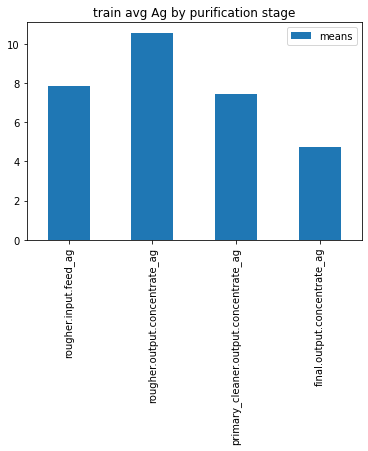

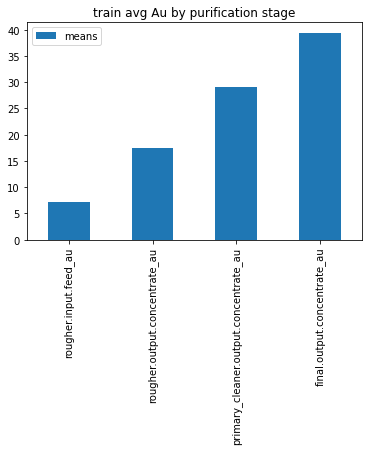

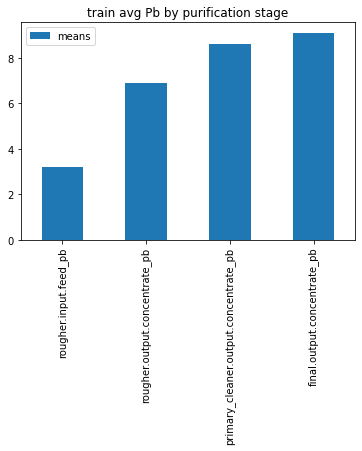

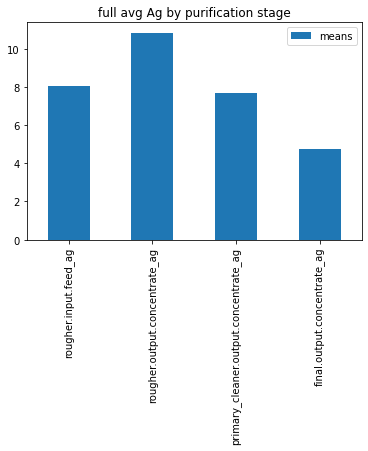

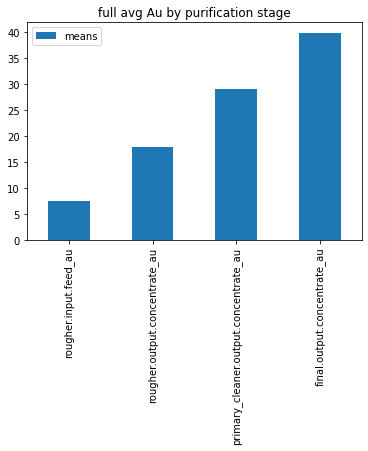

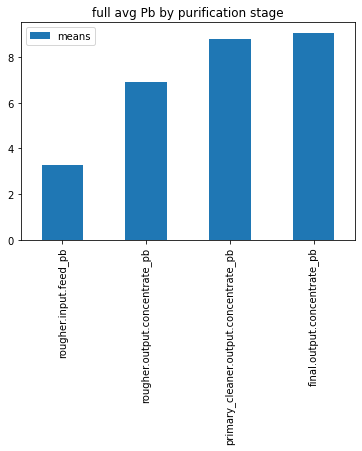

In [176]:
#Tried to plot, but 8 layers of histograms doesn't help.
#Line graph by date makes an x axis to bunched up with dates
#diagram given is wrong, final.tail_au should be final.output.tail_au
#had to make new dataframes all together.
#https://pastebin.com/0Br0AZ0d Removed the tails

train_avg_ag = pd.DataFrame(index=['rougher.input.feed_ag','rougher.output.concentrate_ag','primary_cleaner.output.concentrate_ag','final.output.concentrate_ag'],
                  columns=['means'],
                  data=[train['rougher.input.feed_ag'].mean(),train['rougher.output.concentrate_ag'].mean(),train['primary_cleaner.output.concentrate_ag'].mean(),train['final.output.concentrate_ag'].mean()])

train_avg_ag.plot(title='train avg Ag by purification stage', kind='bar')

train_avg_au = pd.DataFrame(index=['rougher.input.feed_au','rougher.output.concentrate_au','primary_cleaner.output.concentrate_au','final.output.concentrate_au'],
                  columns=['means'],
                  data=[train['rougher.input.feed_au'].mean(),train['rougher.output.concentrate_au'].mean(),train['primary_cleaner.output.concentrate_au'].mean(),train['final.output.concentrate_au'].mean()])

train_avg_au.plot(title='train avg Au by purification stage', kind='bar')

train_avg_pb = pd.DataFrame(index=['rougher.input.feed_pb','rougher.output.concentrate_pb','primary_cleaner.output.concentrate_pb','final.output.concentrate_pb'],
                  columns=['means'],
                  data=[train['rougher.input.feed_pb'].mean(),train['rougher.output.concentrate_pb'].mean(),train['primary_cleaner.output.concentrate_pb'].mean(),train['final.output.concentrate_pb'].mean()])

train_avg_pb.plot(title='train avg Pb by purification stage', kind='bar')


full_avg_ag = pd.DataFrame(index=['rougher.input.feed_ag','rougher.output.concentrate_ag','primary_cleaner.output.concentrate_ag','final.output.concentrate_ag'],
                  columns=['means'],
                  data=[full['rougher.input.feed_ag'].mean(),full['rougher.output.concentrate_ag'].mean(),full['primary_cleaner.output.concentrate_ag'].mean(),full['final.output.concentrate_ag'].mean()])

full_avg_ag.plot(title='full avg Ag by purification stage', kind='bar')

full_avg_au = pd.DataFrame(index=['rougher.input.feed_au','rougher.output.concentrate_au','primary_cleaner.output.concentrate_au','final.output.concentrate_au'],
                  columns=['means'],
                  data=[full['rougher.input.feed_au'].mean(),full['rougher.output.concentrate_au'].mean(),full['primary_cleaner.output.concentrate_au'].mean(),full['final.output.concentrate_au'].mean()])

full_avg_au.plot(title='full avg Au by purification stage', kind='bar')

full_avg_pb = pd.DataFrame(index=['rougher.input.feed_pb','rougher.output.concentrate_pb','primary_cleaner.output.concentrate_pb','final.output.concentrate_pb'],
                  columns=['means'],
                  data=[full['rougher.input.feed_pb'].mean(),full['rougher.output.concentrate_pb'].mean(),full['primary_cleaner.output.concentrate_pb'].mean(),full['final.output.concentrate_pb'].mean()])

full_avg_pb.plot(title='full avg Pb by purification stage', kind='bar')

Silver concentration decreases overall while Gold and Lead concentration go up in both train and full set.

### Compare the feed particle size distributions in the training set and in the test set. If the distributions vary significantly, the model evaluation will be incorrect.

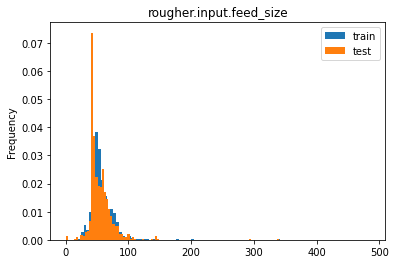

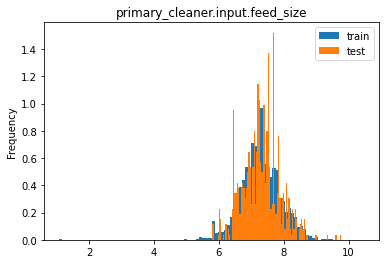

In [177]:
train['rougher.input.feed_size'].plot(title='rougher.input.feed_size',kind='hist',bins=100,grid=False,density=True,label='train')
test['rougher.input.feed_size'].plot(title='rougher.input.feed_size',kind='hist',bins=100,grid=False,density=True,label='test')
plt.legend(loc="upper right")
plt.show()
train['primary_cleaner.input.feed_size'].plot(title='primary_cleaner.input.feed_size',kind='hist',bins=100,grid=False,density=True,label='train')
test['primary_cleaner.input.feed_size'].plot(title='primary_cleaner.input.feed_size',kind='hist',bins=100,grid=False,density=True,label='test')
plt.legend(loc="upper right")
plt.show()

Overall higher averages in training set.

### Consider the total concentrations of all substances at different stages: raw feed, rougher concentrate, and final concentrate. Do you notice any abnormal values in the total distribution? If you do, is it worth removing such values from both samples? Describe the findings and eliminate anomalies.

mean: 50.91413738143498


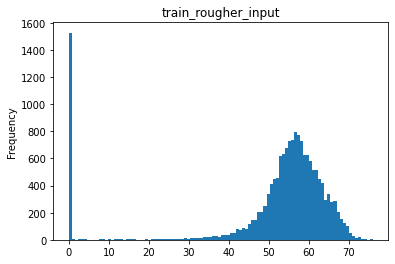

mean: 60.305417876590354


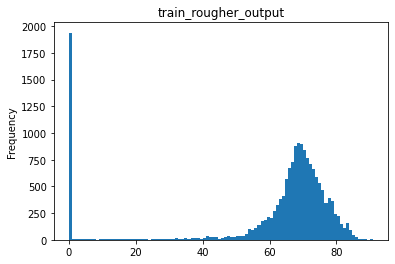

mean: 61.524690143117276


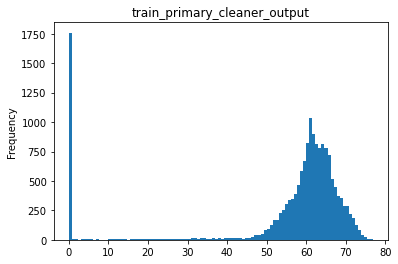

mean: 54.43715856768742


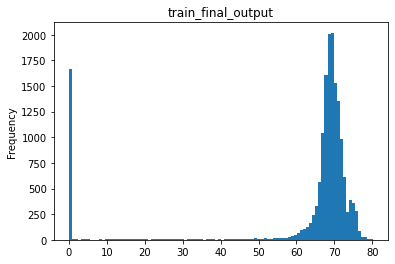

mean: 51.856809906997555


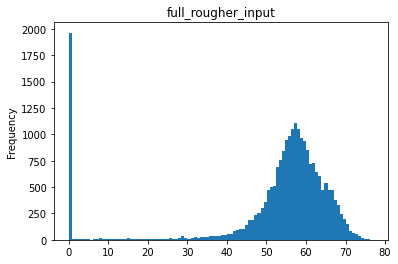

mean: 61.518427191380304


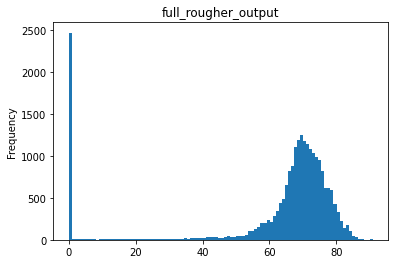

mean: 62.26859873601331


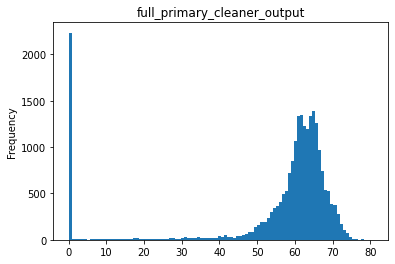

mean: 54.96803339069857


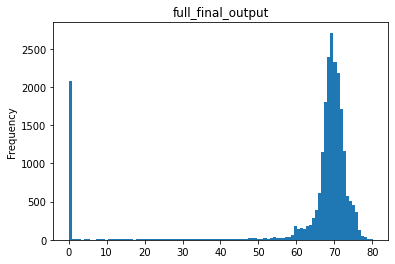

16860
22716


In [178]:
#https://pastebin.com/gWVyj6Fy #didn't need boxplots

train_rougher_input = (train['rougher.input.feed_sol'] + train['rougher.input.feed_pb'] + train['rougher.input.feed_au'] + train['rougher.input.feed_ag'])
train_rougher_output = (train['rougher.output.concentrate_ag'] + train['rougher.output.concentrate_pb'] + train['rougher.output.concentrate_au'] + train['rougher.output.concentrate_sol'])
train_final_output = (train['final.output.concentrate_sol'] + train['final.output.concentrate_au'] + train['final.output.concentrate_pb'] + train['final.output.concentrate_ag'])
train_primary_cleaner_output = (train['primary_cleaner.output.concentrate_ag'] + train['primary_cleaner.output.concentrate_pb'] + train['primary_cleaner.output.concentrate_sol'] + train['primary_cleaner.output.concentrate_au'])

train_rougher_input.plot(title='train_rougher_input',kind='hist',bins=100,grid=False)
print('mean:',train_rougher_input.mean())
plt.show()
train_rougher_output.plot(title='train_rougher_output',kind='hist',bins=100,grid=False)
print('mean:',train_rougher_output.mean())
plt.show()
train_primary_cleaner_output.plot(title='train_primary_cleaner_output',kind='hist',bins=100,grid=False)
print('mean:',train_final_output.mean())
plt.show()
train_final_output.plot(title='train_final_output',kind='hist',bins=100,grid=False)
print('mean:',train_primary_cleaner_output.mean())
plt.show()

full_rougher_input = (full['rougher.input.feed_sol'] + full['rougher.input.feed_pb'] + full['rougher.input.feed_au'] + full['rougher.input.feed_ag'])
full_rougher_output = (full['rougher.output.concentrate_ag'] + full['rougher.output.concentrate_pb'] + full['rougher.output.concentrate_au'] + full['rougher.output.concentrate_sol'])
full_final_output = (full['final.output.concentrate_sol'] + full['final.output.concentrate_au'] + full['final.output.concentrate_pb'] + full['final.output.concentrate_ag'])
full_primary_cleaner_output = (full['primary_cleaner.output.concentrate_ag'] + full['primary_cleaner.output.concentrate_pb'] + full['primary_cleaner.output.concentrate_sol'] + full['primary_cleaner.output.concentrate_au'])

full_rougher_input.plot(title='full_rougher_input',kind='hist',bins=100,grid=False)
print('mean:',full_rougher_input.mean())
plt.show()
full_rougher_output.plot(title='full_rougher_output',kind='hist',bins=100,grid=False)
print('mean:',full_rougher_output.mean())
plt.show()
full_primary_cleaner_output.plot(title='full_primary_cleaner_output',kind='hist',bins=100,grid=False)
print('mean:',full_final_output.mean())
plt.show()
full_final_output.plot(title='full_final_output',kind='hist',bins=100,grid=False)
print('mean:',full_primary_cleaner_output.mean())
plt.show()

print(train.shape[0])
print(full.shape[0])


Suprising amount of zeroes and ones. They are the anomaly.

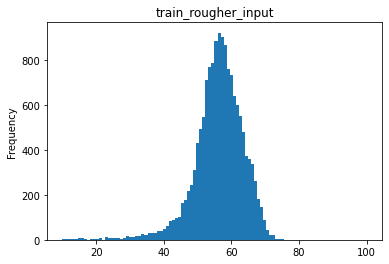

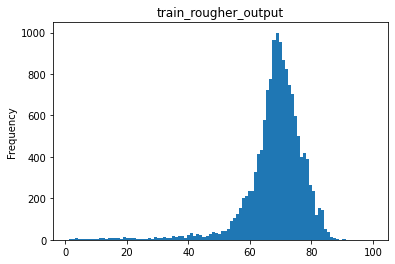

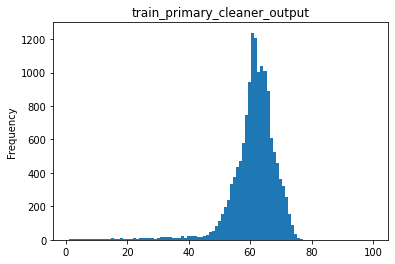

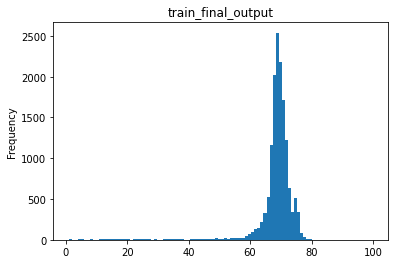

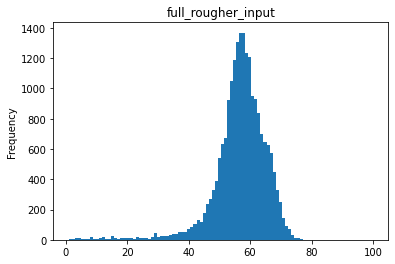

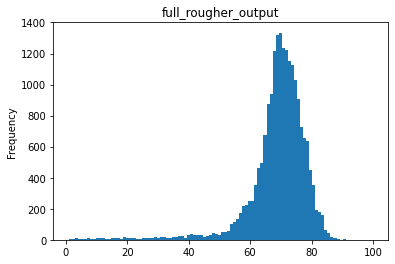

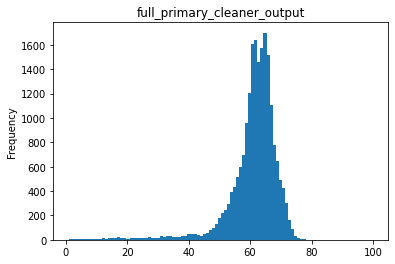

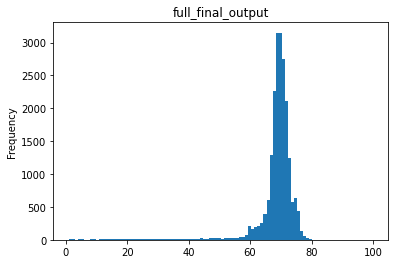

In [179]:
train_rougher_input.plot(title='train_rougher_input',kind='hist',bins=100,grid=False,range=(10,100))
plt.show()
train_rougher_output.plot(title='train_rougher_output',kind='hist',bins=100,grid=False,range=(1,100))
plt.show()
train_primary_cleaner_output.plot(title='train_primary_cleaner_output',kind='hist',bins=100,grid=False,range=(1,100))
plt.show()
train_final_output.plot(title='train_final_output',kind='hist',bins=100,grid=False,range=(1,100))
plt.show()
full_rougher_input.plot(title='full_rougher_input',kind='hist',bins=100,grid=False,range=(1,100))
plt.show()
full_rougher_output.plot(title='full_rougher_output',kind='hist',bins=100,grid=False,range=(1,100))
plt.show()
full_primary_cleaner_output.plot(title='full_primary_cleaner_output',kind='hist',bins=100,grid=False,range=(1,100))
plt.show()
full_final_output.plot(title='full_final_output',kind='hist',bins=100,grid=False,range=(1,100))
plt.show()

Removal is needed, majority of zeros may be ending up in tails. It is good data for understanding how much ore is wasted.

<div class="alert alert-warning">
<b>Reviewer's comment</b>

This comment seems to contradict that you're actually removing the zeros? :)

Anyway, I agree with removing the rows where total concentration at any stage is zero: if there was some material at the start, it can't just all disappear

</div>

In [180]:
train = train[(train['rougher.input.feed_sol'] + train['rougher.input.feed_pb'] + train['rougher.input.feed_au'] + train['rougher.input.feed_ag']) > 1]
train = train[(train['rougher.output.concentrate_ag'] + train['rougher.output.concentrate_pb'] + train['rougher.output.concentrate_au'] + train['rougher.output.concentrate_sol']) > 1]
train = train[(train['final.output.concentrate_sol'] + train['final.output.concentrate_au'] + train['final.output.concentrate_pb'] + train['final.output.concentrate_ag']) > 1]
train = train[(train['primary_cleaner.output.concentrate_ag'] + train['primary_cleaner.output.concentrate_pb'] + train['primary_cleaner.output.concentrate_sol'] + train['primary_cleaner.output.concentrate_au']) > 1]
full = full[(full['rougher.input.feed_sol'] + full['rougher.input.feed_pb'] + full['rougher.input.feed_au'] + full['rougher.input.feed_ag']) > 1]
full = full[(full['rougher.output.concentrate_ag'] + full['rougher.output.concentrate_pb'] + full['rougher.output.concentrate_au'] + full['rougher.output.concentrate_sol']) > 1]
full = full[(full['final.output.concentrate_sol'] + full['final.output.concentrate_au'] + full['final.output.concentrate_pb'] + full['final.output.concentrate_ag']) > 1]
full = full[(full['primary_cleaner.output.concentrate_ag'] + full['primary_cleaner.output.concentrate_pb'] + full['primary_cleaner.output.concentrate_sol'] + full['primary_cleaner.output.concentrate_au']) > 1]

mean: 56.64370015671654


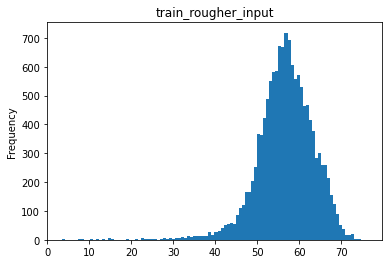

mean: 68.63551340859883


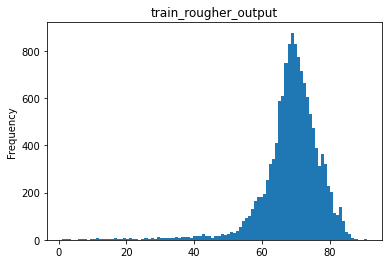

mean: 68.8863506143268


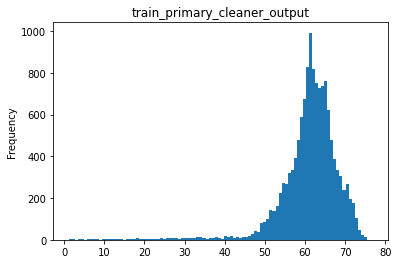

mean: 61.079092179331255


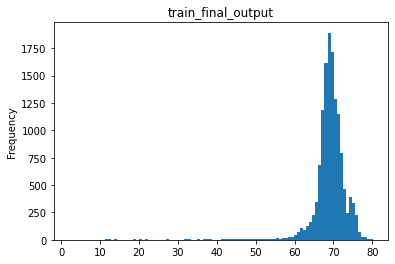

mean: 57.13508504798306


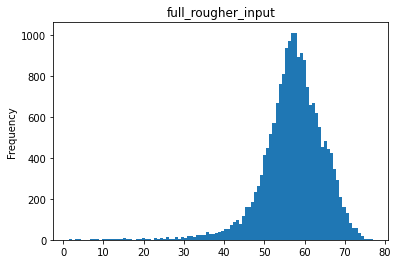

mean: 69.31563341142356


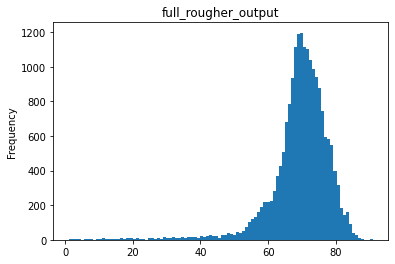

mean: 68.79053950426855


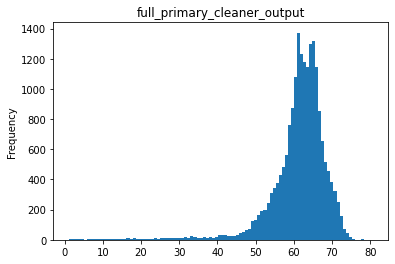

mean: 61.23909479112256


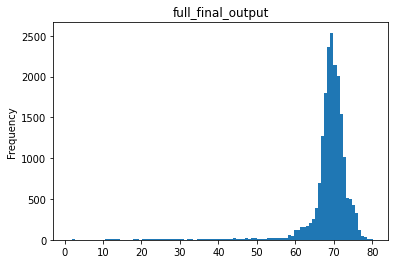

13602
19602


In [181]:
train_rougher_input = (train['rougher.input.feed_sol'] + train['rougher.input.feed_pb'] + train['rougher.input.feed_au'] + train['rougher.input.feed_ag'])
train_rougher_output = (train['rougher.output.concentrate_ag'] + train['rougher.output.concentrate_pb'] + train['rougher.output.concentrate_au'] + train['rougher.output.concentrate_sol'])
train_final_output = (train['final.output.concentrate_sol'] + train['final.output.concentrate_au'] + train['final.output.concentrate_pb'] + train['final.output.concentrate_ag'])
train_primary_cleaner_output = (train['primary_cleaner.output.concentrate_ag'] + train['primary_cleaner.output.concentrate_pb'] + train['primary_cleaner.output.concentrate_sol'] + train['primary_cleaner.output.concentrate_au'])

train_rougher_input.plot(title='train_rougher_input',kind='hist',bins=100,grid=False)
print('mean:',train_rougher_input.mean())
plt.show()
train_rougher_output.plot(title='train_rougher_output',kind='hist',bins=100,grid=False)
print('mean:',train_rougher_output.mean())
plt.show()
train_primary_cleaner_output.plot(title='train_primary_cleaner_output',kind='hist',bins=100,grid=False)
print('mean:',train_final_output.mean())
plt.show()
train_final_output.plot(title='train_final_output',kind='hist',bins=100,grid=False)
print('mean:',train_primary_cleaner_output.mean())
plt.show()

full_rougher_input = (full['rougher.input.feed_sol'] + full['rougher.input.feed_pb'] + full['rougher.input.feed_au'] + full['rougher.input.feed_ag'])
full_rougher_output = (full['rougher.output.concentrate_ag'] + full['rougher.output.concentrate_pb'] + full['rougher.output.concentrate_au'] + full['rougher.output.concentrate_sol'])
full_final_output = (full['final.output.concentrate_sol'] + full['final.output.concentrate_au'] + full['final.output.concentrate_pb'] + full['final.output.concentrate_ag'])
full_primary_cleaner_output = (full['primary_cleaner.output.concentrate_ag'] + full['primary_cleaner.output.concentrate_pb'] + full['primary_cleaner.output.concentrate_sol'] + full['primary_cleaner.output.concentrate_au'])

full_rougher_input.plot(title='full_rougher_input',kind='hist',bins=100,grid=False)
print('mean:',full_rougher_input.mean())
plt.show()
full_rougher_output.plot(title='full_rougher_output',kind='hist',bins=100,grid=False)
print('mean:',full_rougher_output.mean())
plt.show()
full_primary_cleaner_output.plot(title='full_primary_cleaner_output',kind='hist',bins=100,grid=False)
print('mean:',full_final_output.mean())
plt.show()
full_final_output.plot(title='full_final_output',kind='hist',bins=100,grid=False)
print('mean:',full_primary_cleaner_output.mean())
plt.show()

print(train.shape[0])
print(full.shape[0])

## Build the model

### Write a function to calculate the final sMAPE value.

In [182]:
#smape = (1/n)*E(i->n)*(abs(target-prediction)/((abs(target)-abs(prediction))/2))*100
#https://pastebin.com/RyZWK1Sg 
#https://pastebin.com/iPSAxjxb

#based off MAE function

#reminder *x100 isn't 100%, 100% is 1.00
#you can pass in the whole list of y_trues and y_preds to the smape function and you can operate them as a whole (a list can be considered a vector just so you know) Then it can be written simpler like (y_true - y_pred).abs()

def smape(target, predictions):
    return ((target - predictions).abs()/((target.abs() + predictions.abs())/2)).mean()
#.mean() works better than * 100 / N 

#final_smape = 0.25 * smape(rough) + 0.75 * smape(final)
def final_smape(target, predictions):
    rough_smape = smape(target[0], predictions[0])
    final_smape = smape(target[1], predictions[1])
    return (0.25 * rough_smape) + (0.75 * final_smape)

### Train different models. Evaluate them using cross-validation. Pick the best model and test it using the test sample. Provide findings.

In [183]:
#https://pastebin.com/VHf1xWAt for notes
#https://pastebin.com/RsTgcJjk
#https://pastebin.com/gd40rLER
#we are only predicting 'rougher.output.recovery', 'final.output.recovery'


features = test.columns.values
target = ['rougher.output.recovery', 'final.output.recovery']

features_train = train[features].ffill().reset_index(drop=True)
target_train = train[target].ffill().reset_index(drop=True)
target_train.columns = [0, 1]


kf = KFold(n_splits=5)

smape_scores = []

for train_index, test_index in kf.split(features_train):
    features_curr_train = features_train.loc[train_index].reset_index(drop=True)
    target_curr_train = target_train.loc[train_index].reset_index(drop=True)
    features_valid = features_train.loc[test_index].reset_index(drop=True)
    target_valid = target_train.loc[test_index].reset_index(drop=True) 
    #.loc works better for selecting multiple indexes 
    #.drop() for the indexes to match up

    model = LinearRegression()
    model.fit(features_curr_train,target_curr_train)
    predictions_valid = pd.DataFrame(model.predict(features_valid))
    #reminder
    smape_scores.append(final_smape(target_valid, predictions_valid))
    
print(smape_scores)
print('LinearRegression mean smape score',mean(smape_scores))



[0.01047409040794013, 0.018926865123154685, 0.039338235294119686, 0.018933823529497757, 1.1616548179343173e-13]
LinearRegression mean smape score 0.017534602870965685


In [184]:
smape_scores = []

for train_index, test_index in kf.split(features_train):
    features_curr_train = features_train.loc[train_index].reset_index(drop=True)
    target_curr_train = target_train.loc[train_index].reset_index(drop=True)
    features_valid = features_train.loc[test_index].reset_index(drop=True)
    target_valid = target_train.loc[test_index].reset_index(drop=True) 
    #.loc works better for selecting multiple indexes 
    #.drop() for the indexes to match up

    model = DecisionTreeRegressor(random_state=54321)
    model.fit(features_curr_train,target_curr_train)
    predictions_valid = pd.DataFrame(model.predict(features_valid))
    #reminder
    smape_scores.append(final_smape(target_valid, predictions_valid))
    
print(smape_scores)
print('DecisionTreeRegressor mean smape score',mean(smape_scores))

[0.013787874069712679, 0.0161871509973247, 0.009511547158921793, 0.013715087679696465, 0.0036173271857734357]
DecisionTreeRegressor mean smape score 0.011363797418285814


Note: This will take multiple minutes since we are finding the max mean of multiple lists of scores

In [185]:
#https://pastebin.com/cCY8dDGL
 
mean_smape_scores_and_est = {}
for est in range(1,50,10):
    #Checking best estimators
    smape_scores = []
    
    #cross-validation by looping through both indexs
    for train_index, test_index in kf.split(features_train): #KFold instead of train_test_split
        
        features_curr_train = features_train.loc[train_index].reset_index(drop=True)
        target_curr_train = target_train.loc[train_index].reset_index(drop=True)
        
        features_valid = features_train.loc[test_index].reset_index(drop=True)
        target_valid = target_train.loc[test_index].reset_index(drop=True) 

        model = RandomForestRegressor(random_state=54321,n_estimators=est)

        model.fit(features_curr_train,target_curr_train)
        
        
        predictions_valid = pd.DataFrame(model.predict(features_valid))
        #reminder
        smape_scores.append(final_smape(target_valid, predictions_valid))
    smape_scores_mean = mean(smape_scores)
    #print(est)
    print(smape_scores_mean)
    mean_smape_scores_and_est[est] = smape_scores_mean
    
max_mean_est = max(mean_smape_scores_and_est, key=mean_smape_scores_and_est.get)
        
print('RandomForestRegressor mean smape score est:',max_mean_est,'max mean:',mean_smape_scores_and_est[max_mean_est])

0.011641541265440725
0.014589077244460494
0.01736399026532077
0.01788997803851419
0.018520247211610264
RandomForestRegressor mean smape score est: 41 max mean: 0.018520247211610264


A comparison of the final model with a simple constant model as a baseline (e.g. using DummyRegressor).

In [186]:
smape_scores = []

for train_index, test_index in kf.split(features_train):
    features_curr_train = features_train.loc[train_index].reset_index(drop=True)
    target_curr_train = target_train.loc[train_index].reset_index(drop=True)
    features_valid = features_train.loc[test_index].reset_index(drop=True)
    target_valid = target_train.loc[test_index].reset_index(drop=True) 
    #.loc works better for selecting multiple indexes 
    #.drop() for the indexes to match up

    model = DummyRegressor(strategy="mean")
    model.fit(features_curr_train,target_curr_train)
    predictions_valid = pd.DataFrame(model.predict(features_valid))
    #reminder
    smape_scores.append(final_smape(target_valid, predictions_valid))
    
print(smape_scores)
print('DummyRegressor mean smape score',mean(smape_scores))

[0.11675757974008232, 0.10006869891467005, 0.1432845493921956, 0.14063658722750721, 0.10532263749475929]
DummyRegressor mean smape score 0.12121401055384289


Now we test, but we need the original columns.

In [189]:
#test variable needs to be reset.
#you need to save the list of columns from the original test set and use them as features (not the list of columns in the test set merged with the full dataset!), any of the output/calculation columns would cause data leakage, and right now your list of features even includes the targets themselves, which is obviously inappropriate.
features = old_test_columns #old_test_columns was saved earlier in 156 to differentiate them, still has 'date' in it so we need it gone.
target = ['rougher.output.recovery', 'final.output.recovery']

features_train = train[features].ffill().reset_index(drop=True)
target_train = train[target].ffill().reset_index(drop=True)


features_test = test[features].ffill().reset_index(drop=True)
target_test = test[target].ffill().reset_index(drop=True)
target_test.columns = [0, 1]

#smape doen't work if you define features_test and target_test in the cell at the beginning of 3.2

model = DecisionTreeRegressor(random_state=54321)
model.fit(features_train,target_train)
predictions_test = pd.DataFrame(model.predict(features_test))
print('Test smape:',final_smape(target_test, predictions_test))

Test smape: 0.2292062582956781


## Conclusion

Most definitely, DecisionTreeRegressor is the one with best score according to mean smape score 0.011363797418285814.